In [1]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import scipy.stats
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('../peptidome.mplstyle')

import sys
sys.path.append('..')
from lib import *

In [2]:
def load_unirefproteome_as_df_path(path):
    "Return uniref proteome as dataframe given its name"
    headers, seqs = list(zip(*[(h, seq) for h, seq in fasta_iter(path,
        returndescription=True, returnheader=False)]))
    taxids = []
    for h in headers:
        m = re.search('(?<=TaxID\=)[^\s]+', h)
        if m:
             taxids.append(m.group(0))
        else:
             taxids.append('')
    df = pd.DataFrame(dict(header=headers, TaxID=taxids, Sequence=seqs))
    return df

In [3]:
df = load_unirefproteome_as_df_path(datadir + 'human-viruses-uniref50.fasta')

In [38]:
df['TaxID'].value_counts().head(50)

11676     7752
11646      236
10407      160
            58
10310       19
10359       17
10298       16
10242       13
10294       13
40272       12
10258       11
10241       11
10257       10
10358       10
10279       10
37296        8
10375        8
10509        8
10278        7
10243        7
12059        7
333760       6
10374        6
12461        5
11051        4
151340       4
11520        4
99000        4
10376        4
11286        4
10798        4
129951       4
10245        4
11244        4
11320        4
11118        3
10335        3
130308       3
108098       3
10912        3
11632        3
138948       3
10240        3
10360        3
333750       2
10255        2
39733        2
10319        2
77763        2
585893       2
Name: TaxID, dtype: int64

In [4]:
def counter_to_series(counter):
    count_df = pd.DataFrame.from_dict(counter, orient='index', columns=['count'])
    count_series = count_df.T.squeeze()
    return count_series

In [5]:
counter = count_kmers_iterable(df['Sequence'], 10)
count_series = counter_to_series(counter)
np.sum(count_series[count_series>1])/np.sum(count_series)

0.8986556026698217

In [46]:
filtered = df.groupby('TaxID').head(10)

In [47]:
'%e, %e'%(np.sum(df['Sequence'].str.len()), np.sum(filtered['Sequence'].str.len()))

'2.311904e+06, 1.122470e+05'

In [42]:
counter_filtered = count_kmers_iterable(filtered['Sequence'], 10)
count_series_filtered = counter_to_series(counter_filtered)
np.sum(count_series_filtered[count_series_filtered>1])/np.sum(count_series_filtered)

0.1695660959659049

In [43]:
count_series_filtered.sort_values().tail(10)

HQKEPPFLWM     25
KHQKEPPFLW     25
KKHQKEPPFL     25
TVLDVGDAYF     26
VLDVGDAYFS     26
LLEALLEALL     32
LEALLEALLE     33
EALLEALLEA     33
ALLEALLEAL     33
XXXXXXXXXX    986
Name: count, dtype: int64

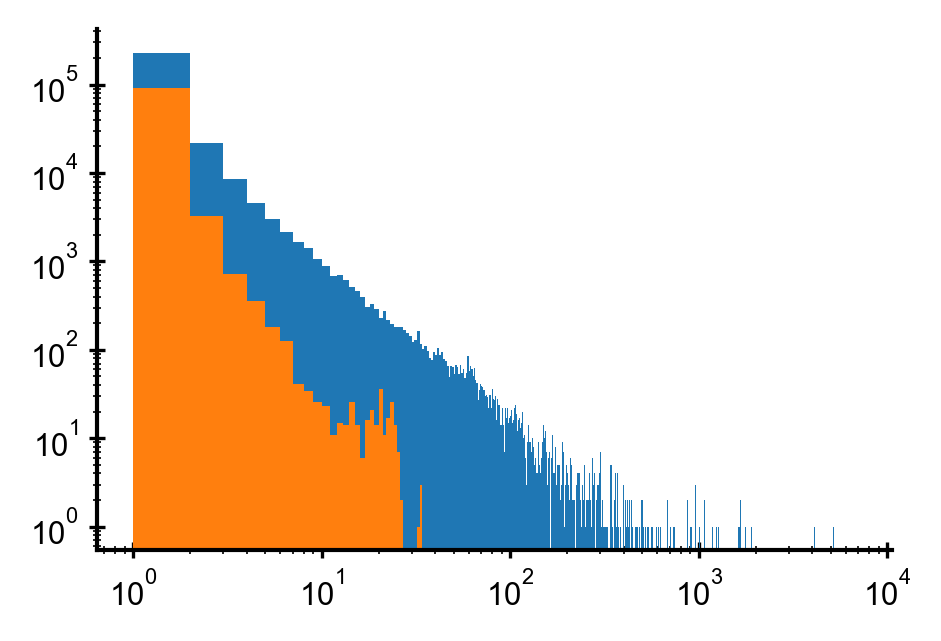

In [44]:
counts, bins, _ = plt.hist(count_series, log=True, bins=np.arange(0, count_series.max()+1, 1));
plt.hist(count_series_filtered, log=True, bins=bins);
plt.xscale('log')